## Phase 1 
- Preparing and Processing Data for Visualisation 

## Data Preprocessing
- We have identified data issues like redundant data will be dropped 
- we will then encode the categorical features in the data 
- Scale the dataset
- Plot a feature importance visualisation, to understandant features that may be important predictor features from the dataset 


In [50]:
# importing required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# Load dataset
data = pd.read_csv(r"C:\Users\hp\Desktop\10Alytics\Python\Machine Learning\ML Supervised Learning WMDIV 22-10-23\Supervised ML live class 21 10 23\waze_dataset.csv")
data.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [52]:
# Statistical description of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,14999.0,7499.000000,4329.982679,0.000000,3749.500000,7499.000000,11248.500000,14998.000000
sessions,14999.0,80.633776,80.699065,0.000000,23.000000,56.000000,112.000000,743.000000
drives,14999.0,67.281152,65.913872,0.000000,20.000000,48.000000,93.000000,596.000000
total_sessions,14999.0,189.964447,136.405128,0.220211,90.661156,159.568115,254.192341,1216.154633
n_days_after_onboarding,14999.0,1749.837789,1008.513876,4.000000,878.000000,1741.000000,2623.500000,3500.000000
total_navigations_fav1,14999.0,121.605974,148.121544,0.000000,9.000000,71.000000,178.000000,1236.000000
total_navigations_fav2,14999.0,29.672512,45.394651,0.000000,0.000000,9.000000,43.000000,415.000000
driven_km_drives,14999.0,4039.340921,2502.149334,60.441250,2212.600607,3493.858085,5289.861262,21183.401890
duration_minutes_drives,14999.0,1860.976012,1446.702288,18.282082,835.996260,1478.249859,2464.362632,15851.727160
activity_days,14999.0,15.537102,9.004655,0.000000,8.000000,16.000000,23.000000,31.000000


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [54]:
data.describe(include = [object]).T

,count,unique,top,freq
label,14299,2,retained,11763
device,14999,2,iPhone,9672


In [55]:
data['label'].unique()

array(['retained', 'churned', nan], dtype=object)

In [56]:
data['label'].value_counts()

retained    11763
churned      2536
Name: label, dtype: int64

In [57]:
data.duplicated().sum()

0

In [58]:
data.isna().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

In [59]:
# Exploring the target variable
data['label'].describe()

count        14299
unique           2
top       retained
freq         11763
Name: label, dtype: object

<Axes: ylabel='label'>

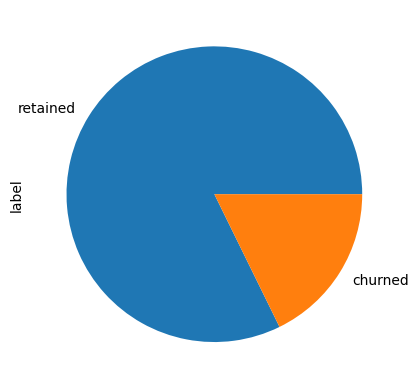

In [60]:
data['label'].value_counts().plot(kind = 'pie')

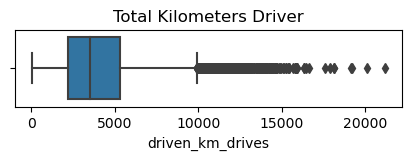

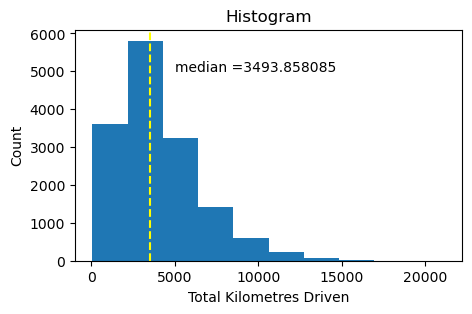

In [61]:
plt.figure(figsize =(5,1))
g = sns.boxplot(data = data, x = 'driven_km_drives')
plt.title('Total Kilometers Driver')
plt.show()

plt.figure(figsize = (5,3))
plt.hist(data['driven_km_drives'])
plt.xlabel('Total Kilometres Driven')
plt.ylabel('Count')
plt.title('Histogram')


median = data['driven_km_drives'].median()
plt.axvline(median, color = 'yellow', linestyle = '--')
plt.text(5000, 5000, 'median =' +str(median), color = 'black')
plt.show()

In [62]:
# Drop missing data points  
data.dropna(inplace = True)

In [63]:
data.isna().sum()

ID                         0
label                      0
sessions                   0
drives                     0
total_sessions             0
n_days_after_onboarding    0
total_navigations_fav1     0
total_navigations_fav2     0
driven_km_drives           0
duration_minutes_drives    0
activity_days              0
driving_days               0
device                     0
dtype: int64

In [64]:
# segment dataset
y = data.pop('label')


In [65]:
#variable encoding using one hot encoding 

data = pd.get_dummies(data, drop_first=True)
data.head(2)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device_iPhone
0,0,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,0
1,1,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,1


In [66]:
# dropping the reduntant data features
data.drop('ID', axis =1, inplace = True)

## key Observations 
- Missing data points in the lebel column were dropped
- No duplicates
- This is churn prediction model
- from our observation of our target label we can see that the data set is imbalanced
- from the observing the distribution of the total kilometers driven feature, can see the presence of outliers
- distribution is positely skewed

In [67]:
#data nomalisation
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# Instantaite scaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
df_scaled.head(2)

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device_iPhone
0,0.380888,0.379195,0.243868,0.649886,0.168285,0.000000,0.121593,0.124262,0.903226,0.633333,0.0
1,0.179004,0.179530,0.268663,0.349256,0.015372,0.154217,0.646476,0.198453,0.419355,0.366667,1.0


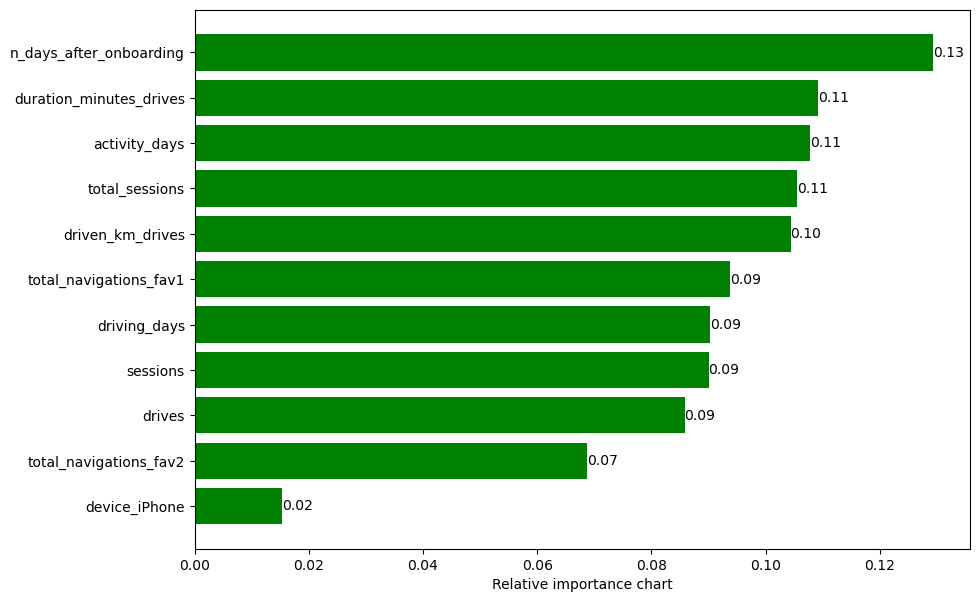

In [68]:
#identify the key predictor features in the dataset

from sklearn.ensemble import RandomForestClassifier 
import matplotlib.pyplot as plt

# Instantiated the randomregressor model
feat_model = RandomForestClassifier()

# fits model
feat_model.fit(df_scaled, y)

feature_names = list(df_scaled.columns)
importance = feat_model.feature_importances_
indices = np.argsort(importance)

plt.figure(figsize = (10,7))
plt.barh(range(len(indices)), importance[indices], color = 'green', align = 'center')
plt.yticks(range(len(indices)),[feature_names[i] for i in indices])
plt.xlabel('Relative importance chart')


# Add value labels to the bars
for i in range(len(indices)):
    plt.text(importance[indices][i], i, f'{importance[indices][i]:.2f}', ha='left', va='center')

plt.show()


## Observations
- The relative importance chart displays the predictive variables (in order of importance) with predictive power
- From the chart, n_days_after_onboarding (The number of days since a user sign up for the app) has the highest predictive power while device_iphone has the least predictive power


For churn prediction, user behavior indicators such as engagement frequency, duration, and specific preferences are more crucial than the type of device used. The model suggests that long-term, engaged users who actively use the app for its intended purpose are less likely to churn.

## Phase 2
- Splitting data into training and evaluation datasets
- Implimenting Manchine Learning/model Building and Training
- creating a predictions file 

In [69]:
# split data into training and evaluation sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_scaled, y, test_size = 0.3, random_state = 1)

# x_train will contain the training feature data.
# x_test will contain the evaluation (test) feature data.
# y_train will contain the training target data.
# y_test will contain the evaluation (test) target data.

In [70]:
x_train.shape, x_test.shape, y_train.shape,  y_test.shape

((10009, 11), (4290, 11), (10009,), (4290,))

In [71]:
# importing predictive models 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
# intantiating models 
log_reg = LogisticRegression()
dec_tree = DecisionTreeClassifier()
gb_clf= GradientBoostingClassifier() # Gradient boosting is an ensemble learning technique that combines multiple weak models (typically decision trees) to create a stronger predictive model.

In [73]:
# taining the model  
log_reg.fit(x_train,y_train)
dec_tree.fit(x_train,y_train)
gb_clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [74]:
# creating a prediction file for all the modes
log_pred = log_reg.predict(x_test)
dec_pred = dec_tree.predict(x_test)
gb_pred = gb_clf.predict(x_test)

In [75]:
log_pred

array(['retained', 'retained', 'retained', ..., 'retained', 'retained',
       'retained'], dtype=object)

In [76]:
dec_pred

array(['retained', 'churned', 'retained', ..., 'retained', 'retained',
       'churned'], dtype=object)

In [77]:
gb_pred

array(['retained', 'retained', 'retained', ..., 'retained', 'retained',
       'retained'], dtype=object)

## Phase 3
- model evaluation and interpretation phase
- metrics to use for classification problems
 >confusion matrix, 
 >classification report

In [78]:
# importing evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

In [79]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [80]:
# classification_report
print('classification report for the  logistic regression model \n', classification_report(y_test, log_pred))

classification report for the  logistic regression model 
               precision    recall  f1-score   support

     churned       0.52      0.07      0.12       778
    retained       0.83      0.99      0.90      3512

    accuracy                           0.82      4290
   macro avg       0.68      0.53      0.51      4290
weighted avg       0.77      0.82      0.76      4290



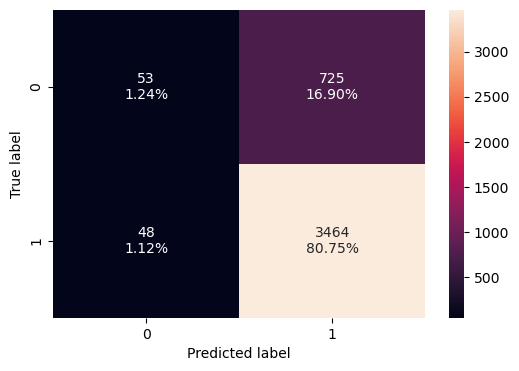

In [81]:
confusion_matrix_sklearn(log_reg,x_test,y_test)

In [82]:
print("classification report for the decision tree model \n",classification_report(y_test,dec_pred))

classification report for the decision tree model 
               precision    recall  f1-score   support

     churned       0.26      0.27      0.26       778
    retained       0.84      0.83      0.83      3512

    accuracy                           0.73      4290
   macro avg       0.55      0.55      0.55      4290
weighted avg       0.73      0.73      0.73      4290



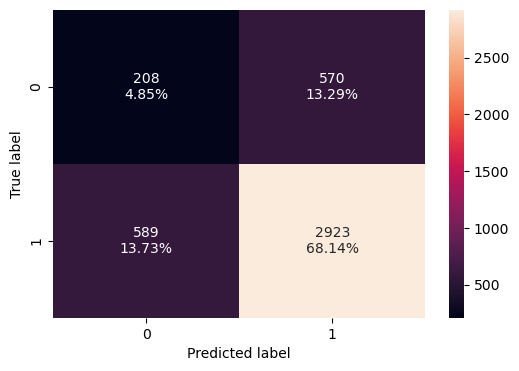

In [83]:
confusion_matrix_sklearn(dec_tree,x_test,y_test)

In [84]:
print("classification report for the Gradient Boosting model \n",classification_report(y_test,gb_pred))

classification report for the Gradient Boosting model 
               precision    recall  f1-score   support

     churned       0.50      0.08      0.13       778
    retained       0.83      0.98      0.90      3512

    accuracy                           0.82      4290
   macro avg       0.67      0.53      0.52      4290
weighted avg       0.77      0.82      0.76      4290



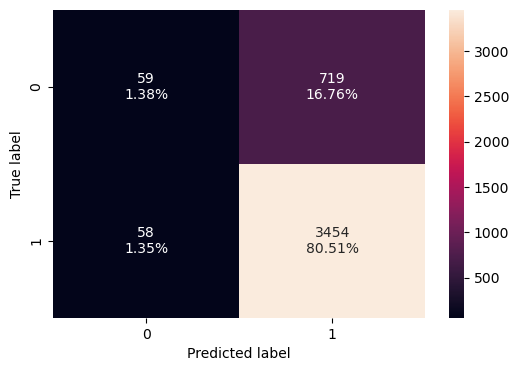

In [85]:
confusion_matrix_sklearn(gb_clf,x_test,y_test)

# Interpret and compare the 3 models
The classification reports provide a comprehensive evaluation of the performance of three different models (Logistic Regression, Decision Tree, and Gradient Boosting) on a binary classification task. Here's an interpretation and comparison of the results:
## Logistic Regression Model:
- Precision: Precision for the 'churned' class is low (0.52), indicating that when the model predicts a customer will churn, it is correct about 52% of the time. On the other hand, the precision for the 'retained' class is high (0.83).
- Recall: Recall for the 'churned' class is very low (0.07), suggesting that the model misses a significant number of actual churned customers. However, recall for the 'retained' class is high (0.99), indicating that the model effectively captures the majority of retained customers.
- F1-Score: The F1-score is a harmonic mean of precision and recall. The F1-score for 'churned' is low (0.12), reflecting the trade-off between precision and recall. The F1-score for 'retained' is high (0.90), indicating a good balance between precision and recall.
- Accuracy: Overall accuracy is 82%, meaning the model correctly predicts the class for 82% of instances.
## Decision Tree Model:
- Precision: Precision for the 'churned' class is relatively low (0.27), and precision for the 'retained' class is high (0.84).
- Recall: Recall for both classes is similar, with 'churned' at 0.28 and 'retained' at 0.84.
- F1-Score: The F1-score for 'churned' is moderate (0.28), and for 'retained' is high (0.84).
- Accuracy: Overall accuracy is 73%, which is lower than the Logistic Regression model.
## Gradient Boosting Model:
- Precision: Precision for the 'churned' class is similar to Logistic Regression (0.52), and precision for the 'retained' class is high (0.83).
- Recall: Recall for 'churned' is low (0.08), similar to Logistic Regression, while recall for 'retained' is high (0.98), similar to the Logistic Regression model.
- F1-Score: The F1-score for 'churned' is low (0.13), and for 'retained' is high (0.90).
- Accuracy: Overall accuracy is 82%, matching the Logistic Regression model.
## Comparison:
- The Decision Tree model generally performs the worst, with lower precision, recall, and accuracy compared to Logistic Regression and Gradient Boosting.
- Logistic Regression and Gradient Boosting models show similar performance, with high precision and recall for the 'retained' class and lower values for the 'churned' class.
- Accuracy is higher for Logistic Regression and Gradient Boosting compared to the Decision Tree.
## Business Recommendations and Conclusions:
- If the goal is to prioritize precision for predicting customer churn, further tuning and evaluation may be necessary, as both Logistic Regression and Gradient Boosting models have relatively low precision for the 'churned' class.
- The Decision Tree model might need improvement, and its overall lower accuracy suggests it may not be the best choice for this specific task.


# Phase 4: 
## Hyperparameter Optimization and Productionizing Our Model
- hyperparameter optimization is the art and science of improving our model's performances. think of hyperparameter optimization as some configurations, or settings you can implemement or tweak that can improve your model's performance.

- this is the last stage of the machine learning pipeline, and the main aim here points to how the users use/consume the model. there are alot of ways an ML Model can be used

- it can be embedded into an application to be used by users online via an API on web interfaces or on mobile devices It can be used to create reports or dashboards that will be used by the organisation in making key business decisions it can be consumed via streaming or batch methods

In this case scenario, we will simulate the use of the model on a new dataset and use it to make relevant predictions

In [92]:
# hyperparameter optimization
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,r2_score
import random

In [41]:

""""
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

import warnings 
warnings.filterwarnings('ignore')


opt_model = DecisionTreeClassifier()

params = {
    'ccp_alpha': np.arange(0, 1, 0.2).tolist(),
    'criterion': ['entropy', 'gini'],
    'max_depth': [5, 9, 12, 10, 15, 25, 50],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(opt_model, params, scoring='accuracy', cv=3, return_train_score=True, refit=True)
grid_search.fit(x_train, y_train)

# Print the best parameters
print("3rd Best params combination:", grid_search.best_params_, "\n");
""""

3rd Best params combination: {'ccp_alpha': 0.2, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt'} 



In [45]:
""""
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

import warnings 
warnings.filterwarnings('ignore')

opt_model = GradientBoostingClassifier()

params = {
    'n_estimators': [50, 100, 150],  # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage to prevent overfitting
    'max_depth': [3, 5, 7],  # Maximum depth of the individual trees
    'subsample': [0.8, 1.0],  # Fraction of samples used for fitting the trees
    'criterion': ['friedman_mse', 'mse'],  # Loss function to be optimized
    'max_features': ['auto', 'sqrt', 'log2']  # Maximum number of features to consider for a split
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(opt_model, params, scoring='accuracy', cv=3, return_train_score=True, refit=True)
grid_search.fit(x_train, y_train)

# Print the best parameters
print("2nd Best params combination:", grid_search.best_params_, "\n")
""""

2nd Best params combination: {'criterion': 'friedman_mse', 'learning_rate': 0.2, 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 50, 'subsample': 0.8} 



In [106]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV
import numpy as np

import warnings 
warnings.filterwarnings('ignore')

opt_model = LogisticRegression()

params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
    'max_iter': [100, 200, 300],  # Maximum number of iterations
    'solver': ['liblinear'],  # Solver for optimization
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(opt_model, params, scoring='accuracy', cv=3, return_train_score=True, refit=True)
grid_search.fit(x_train, y_train)

# Print the best parameters
print("Ist Best params combination:", grid_search.best_params_, "\n")

Ist Best params combination: {'C': 1, 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'} 



In [108]:
#measuring performance on evaluation set
best_model = grid_search.best_estimator_
best_pred = best_model.predict(x_test)
best_pred

array(['retained', 'retained', 'retained', ..., 'retained', 'retained',
       'retained'], dtype=object)

In [109]:
print("classification report for optimzed decision tree model \n",classification_report(y_test,best_pred))

classification report for optimzed decision tree model 
               precision    recall  f1-score   support

     churned       0.52      0.07      0.12       778
    retained       0.83      0.99      0.90      3512

    accuracy                           0.82      4290
   macro avg       0.67      0.53      0.51      4290
weighted avg       0.77      0.82      0.76      4290



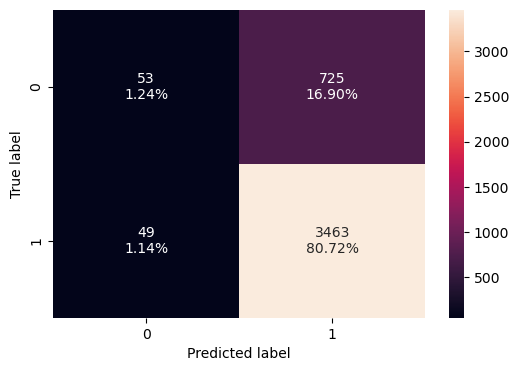

In [110]:
confusion_matrix_sklearn(best_model,x_test,y_test)

In [111]:
#Productionizing models
import joblib

filename = './dec_model.pkl'
joblib.dump(log_reg,filename)

['./dec_model.pkl']